In [8]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data = pd.read_csv('/home/ubuntu/year3/data_visualisation/student.csv')
data

,Statistic,Algebra,Geometry,Geography,Biology,Physics,Chemistry,Earth Sciences,Literature,Writing,Speech,Economics,Programming
0,14.23,6.84,9.72,15.6,2.8,2.29,127,5.64,14.00,3.06,1.04,3.92,1065
1,13.20,7.12,8.56,11.2,2.6,1.28,100,4.38,13.25,2.76,1.05,3.40,1050
2,13.16,9.44,10.68,18.6,3.0,2.81,101,5.68,14.00,3.24,1.03,3.17,1185
3,14.37,7.80,10.00,16.8,2.4,2.18,113,7.80,19.25,3.49,0.86,3.45,1480
4,13.24,10.36,11.48,21.0,3.9,1.82,118,4.32,14.00,2.69,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,22.60,9.80,20.5,5.2,1.06,95,7.70,8.40,0.61,0.64,1.74,740
174,13.40,15.64,9.92,23.0,4.3,1.41,102,7.30,9.00,0.75,0.70,1.56,750
175,13.27,17.12,9.04,20.0,4.3,1.35,120,10.20,7.95,0.69,0.59,1.56,835
176,13.17,10.36,9.48,20.0,5.3,1.46,120,9.30,8.25,0.68,0.60,1.62,840


PCA

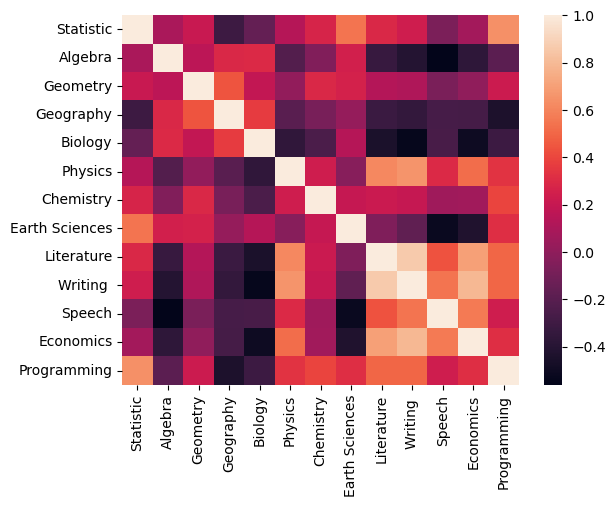

In [12]:
X_mean = data.mean()
X_std = data.std()
Z = (data - X_mean) / X_std
c = Z.cov()
sns.heatmap(c)
plt.show()


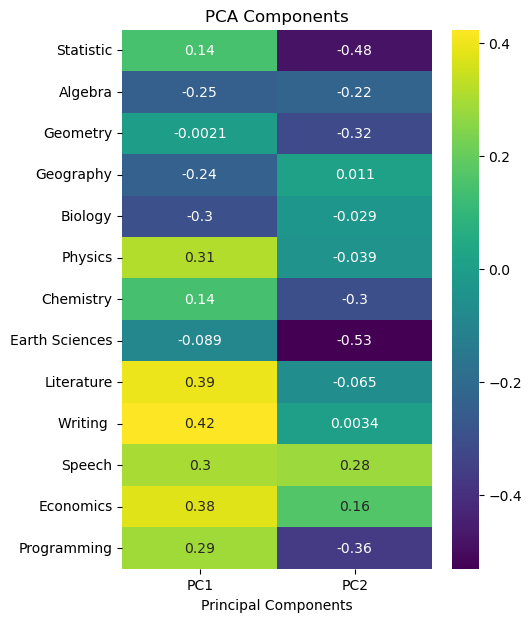

In [22]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import StandardScaler


df = pd.DataFrame(data)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

n_components = 2
pca = PCA(n_components=n_components)
pca.fit(scaled_data)

u = pca.components_.T  
pca_component = pd.DataFrame(u, index=df.columns, columns=['PC1', 'PC2'])

plt.figure(figsize=(5, 7))
sns.heatmap(pca_component, annot=True, cmap='viridis')
plt.title('PCA Components')
plt.xlabel("Principal Components")
plt.show()

/home/ubuntu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ubuntu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ubuntu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ubuntu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ubuntu/anacond

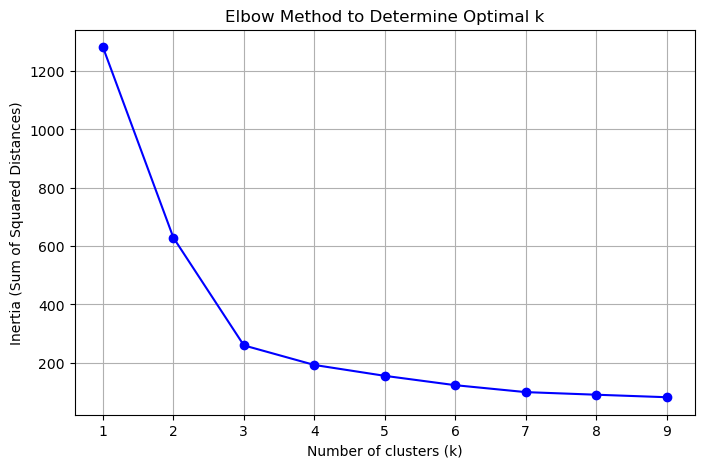

In [24]:
pca_data = pca.fit_transform(scaled_data)

inertia = []
k_range = range(1, 10)  
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    inertia.append(kmeans.inertia_) 

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method to Determine Optimal k")
plt.grid(True)
plt.show()


In [25]:
#k = 3

/home/ubuntu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


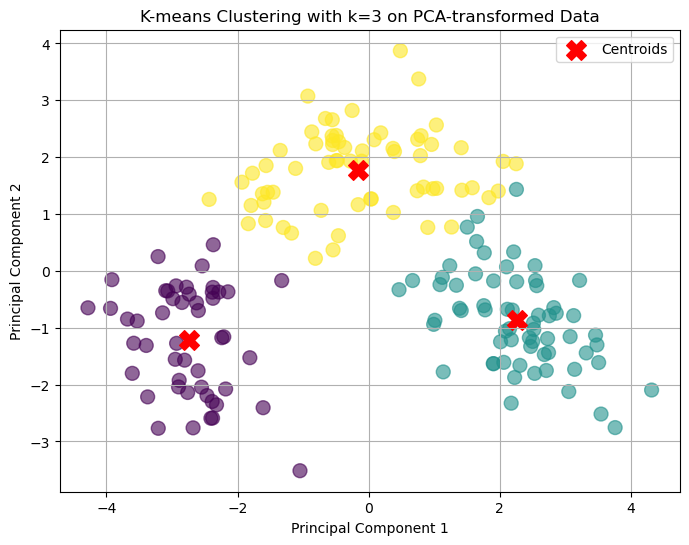

In [26]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_data)

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', s=100, alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            color='red', marker='X', s=200, label='Centroids')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-means Clustering with k=3 on PCA-transformed Data")
plt.legend()
plt.grid(True)
plt.show()

After performing PCA and K-means clustering on the dataset, I can conclude that

    Number of Groups: Based on the K-means clustering with k=3, the students are divided into three distinct groups. Each group represents a cluster of students with similar academic performance patterns.

        Cluster 0(purple): This group might contain students who have good marks in certain subjects but have average performance in others.

        Cluster 1(yellow): This group could represent students who perform consistently well across all subjects.

        Cluster 2(blue): This group might include students who need improvement in most subjects.

    Insights: By examining the mean values of each cluster, teachers can adjust their teaching strategies to address the specific needs of each group, ultimately enhancing student learning outcomes.

